In [1]:
import pandas as pd
from ast import literal_eval
from tqdm.notebook import tqdm
tqdm.pandas()
from datetime import datetime
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

The Understand the preference of food by the people over the globe in the Summer and Christmas Season.

Understand the specific and number of topics from the data.

In [2]:
# from google.colab import drive 
# drive.mount('/content/drive')

In [3]:
data_path = 'snacks_prep.csv'
print('Loading dataset at: ',datetime.now())
df = pd.read_csv(data_path, sep='\t', converters={'doc_entities': literal_eval, 'doc_keyphrases': literal_eval})
print('Loaded dataset at: ',datetime.now())

Loading dataset at:  2022-11-17 00:43:14.509378
Loaded dataset at:  2022-11-17 00:44:20.126858


In [4]:
df.shape

(80460, 9)

In [53]:
df

id  \
0      U3-e4dabc69c877013e62dcfa2fbfdf29e4   
1      U3-e4dabc69c877013e62dcfa2fbfdf29e4   
2      U3-e4dabc69c877013e62dcfa2fbfdf29e4   
3      U3-e4dabc69c877013e62dcfa2fbfdf29e4   
4      U3-e4dabc69c877013e62dcfa2fbfdf29e4   
...                                    ...   
80455  U3-4d8532baa03e30b0ecb4d6bb4b00475a   
80456  U3-4d8532baa03e30b0ecb4d6bb4b00475a   
80457  U3-4d8532baa03e30b0ecb4d6bb4b00475a   
80458  U3-4d8532baa03e30b0ecb4d6bb4b00475a   
80459  U3-4d8532baa03e30b0ecb4d6bb4b00475a   

                                                sentence  doc_sentiment  \
0      ATLANTA, March 29, 2017 /PRNewswire/ -- It's g...          0.125   
1      In honor of Pretzelmaker's 26th birthday, the ...          0.125   
2      * For 26 years, Pretzelmaker has served up fre...          0.125   
3      On National Pretzel Day, the brand will celebr...          0.125   
4      To get the country fired up for April 26, Pret...          0.125   
...                                                  ...            ...   
80455  Health Minister Olivier Veran said that would ...         -0.100   
80456  "The wave linked to the Delta variant is clear...         -0.100   
80457  France reported over 425,000 coronavirus infec...         -0.100   
80458  The vaccine pass, approved by parliament on Su...         -0.100   
80459  Castex also encouraged parents to vaccinate ch...         -0.100   

                   doc_date  \
0      2017-03-29T12:38:43Z   
1      2017-03-29T12:38:43Z   
2      2017-03-29T12:38:43Z   
3      2017-03-29T12:38:43Z   
4      2017-03-29T12:38:43Z   
...                     ...   
80455  2022-01-20T19:09:00Z   
80456  2022-01-20T19:09:00Z   
80457  2022-01-20T19:09:00Z   
80458  2022-01-20T19:09:00Z   
80459  2022-01-20T19:09:00Z   

                                               doc_title  \
0      26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
1      26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
2      26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
3      26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
4      26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
...                                                  ...   
80455  France to loosen COVID curbs in February, allo...   
80456  France to loosen COVID curbs in February, allo...   
80457  France to loosen COVID curbs in February, allo...   
80458  France to loosen COVID curbs in February, allo...   
80459  France to loosen COVID curbs in February, allo...   

                                                 doc_url  \
0      https://ceo.ca/@newswire/26-pretzels-to-celebr...   
1      https://ceo.ca/@newswire/26-pretzels-to-celebr...   
2      https://ceo.ca/@newswire/26-pretzels-to-celebr...   
3      https://ceo.ca/@newswire/26-pretzels-to-celebr...   
4      https://ceo.ca/@newswire/26-pretzels-to-celebr...   
...                                                  ...   
80455  https://www.reuters.com/world/europe/france-un...   
80456  https://www.reuters.com/world/europe/france-un...   
80457  https://www.reuters.com/world/europe/france-un...   
80458  https://www.reuters.com/world/europe/france-un...   
80459  https://www.reuters.com/world/europe/france-un...   

                                            doc_entities  \
0      [{'entityType': 'Organisation', 'name': 'PR Ne...   
1      [{'entityType': 'Organisation', 'name': 'PR Ne...   
2      [{'entityType': 'Organisation', 'name': 'PR Ne...   
3      [{'entityType': 'Organisation', 'name': 'PR Ne...   
4      [{'entityType': 'Organisation', 'name': 'PR Ne...   
...                                                  ...   
80455  [{'entityType': 'Settlement', 'name': 'Nantes'...   
80456  [{'entityType': 'Settlement', 'name': 'Nantes'...   
80457  [{'entityType': 'Settlement', 'name': 'Nantes'...   
80458  [{'entityType': 'Settlement', 'name': 'Nantes'...   
80459  [{'entityType': 'Settlement', 'name': 'Nantes'...   

                                          doc_keyp

In [5]:
df.isnull().sum()

id                          0
sentence                  561
doc_sentiment               0
doc_date                    0
doc_title                   0
doc_url                     0
doc_entities                0
doc_keyphrases              0
doc_publish_location    35257
dtype: int64

Count of NA values.

In [52]:
data = pd.read_csv('practice.csv')
data['doc_url']

0       https://ceo.ca/@newswire/26-pretzels-to-celebr...
1       https://ceo.ca/@newswire/26-pretzels-to-celebr...
2       https://ceo.ca/@newswire/26-pretzels-to-celebr...
3       https://ceo.ca/@newswire/26-pretzels-to-celebr...
4       https://ceo.ca/@newswire/26-pretzels-to-celebr...
                              ...                        
3995    https://www.bbc.com/future/article/20210225-ar...
3996    https://www.bbc.com/future/article/20210225-ar...
3997    https://www.bbc.com/future/article/20210225-ar...
3998    https://www.bbc.com/future/article/20210225-ar...
3999    https://www.bbc.com/future/article/20210225-ar...
Name: doc_url, Length: 4000, dtype: object

In [51]:
df['doc_url'].nunique()

8518

The data is scraped from the 8518 different links, and every URL has unique Link.
For example, for first link or URL - 19 sentences/entries in dataframe.

In [7]:
df[df['id']=='U3-e4dabc69c877013e62dcfa2fbfdf29e4'].reset_index().drop(['index'],1).shape

(19, 9)

In [8]:
dict1 = {
        'id' : [],        
        'sentences' : [],
        'doc_sentiment' : [],
        'doc_date' : [],
        'doc_title' : [],
        'doc_url' : [],
        'doc_entities' : [],
        'doc_keyphrases' : [],
        'doc_publish_location' :[]
        }

In [10]:
for i1 in list(df['id'].unique()):
    temp_df = df[df['id'] == i1].reset_index().drop(['index'],1)
    try:
        dict1['id'].append(i1)
        dict1['doc_date'].append(temp_df['doc_date'][0])
        dict1['doc_title'].append(temp_df['doc_title'][0])
        dict1['doc_url'].append(temp_df['doc_url'][0])
        dict1['doc_entities'].append(temp_df['doc_entities'][0])
        dict1['doc_keyphrases'].append(temp_df['doc_keyphrases'][0])
        dict1['doc_publish_location'].append(temp_df['doc_publish_location'][0])
        dict1['doc_sentiment'].append(temp_df['doc_sentiment'][0])
        dict1['sentences'].append('.'.join(temp_df['sentence']))
    except:
        dict1['sentences'].append(temp_df['sentence'][0])

In [11]:
final_df = pd.DataFrame(dict1)
final_df.shape

(8518, 9)

In [12]:
final_df

id  \
0     U3-e4dabc69c877013e62dcfa2fbfdf29e4   
1     U3-8e3d1964db6f9f6b2c9a1b02121173f8   
2     U3-7bb72eb70bc2e837b5147bf9498c69c7   
3     U3-de06594c93fee2e5da5e2f3407268c7e   
4     U3-f9f7b7cdc33760b9556bf94f782df52c   
...                                   ...   
8513  U3-f2746bd383490c6d79b06bab4d860fb5   
8514  U3-83855e97e114a1836fc4dd6001ed270b   
8515  U3-c6046adb5706e79a2cf6499421000336   
8516  U3-c66d76f4dff8899f9ce1be322755893f   
8517  U3-4d8532baa03e30b0ecb4d6bb4b00475a   

                                              sentences  doc_sentiment  \
0     ATLANTA, March 29, 2017 /PRNewswire/ -- It's g...       0.125000   
1     A group of 550 professional food buyers from m...       0.078947   
2     Research by Pets at Home revealed that pet own...       0.272727   
3     PHILADELPHIA, April 12, 2017 /PRNewswire/ -- T...       0.148148   
4     Some of the major players in the market are Aj...       0.210526   
...                                                 ...            ...   
8513                                                NaN       0.000000   
8514                                                NaN       0.000000   
8515  *I used Wilton's Caramel Apple Candy Melts bec...       0.000000   
8516  In these instances, a 40g bag of vegetable cri...       0.000000   
8517  A medical worker administers a nasal swab to a...      -0.100000   

                  doc_date                                          doc_title  \
0     2017-03-29T12:38:43Z  26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
1     2018-04-12T06:00:00Z  One million packets of Keogh's crisps to be se...   
2     2021-02-11T15:12:34Z  15 Valentine's Day gifts for dogs including do...   
3     2017-04-12T23:44:02Z  Philly Pretzel Factory Celebrates 10 Years of ...   
4     2018-12-28T00:19:58Z  Cashew Nuts Market Size, Share, Growth, Trends...   
...                    ...                                                ...   
8513  2019-06-18T18:16:00Z  Almonds Beauty Benefits: From Hair Growth to E...   
8514  2017-02-24T18:28:29Z           5 Ways to Make a Better Batch of Popcorn   
8515  2017-01-07T00:00:00Z                                 Pretzel Pop Snakes   
8516  2017-07-04T01:46:11Z  'Healthy' vegetable crisps contain more fat th...   
8517  2022-01-20T19:09:00Z  France to loosen COVID curbs in February, allo...   

                                                doc_url  \
0     https://ceo.ca/@newswire/26-pretzels-to-celebr...   
1     https://www.irishtimes.com/life-and-style/food...   
2     https://www.manchestereveningnews.co.uk/whats-...   
3     https://ceo.ca/@newswire/philly-pretzel-factor...   
4     http://www.dhanbadnewspaper.in/story/53309/cas...   
...                                                 ...   
8513  https://www.latestly.com/lifestyle/almonds-bea...   
8514  http://www.thekitchn.com/5-things-to-know-abou...   
8515  http://kidsactivitiesblog.com/64816/pretzel-po...   
8516  http://topcelebritymag.com/healthy-vegetable-c...   
8517  https://www.reuters.com/world/europe/france-un...   

                                           doc_entities  \
0     [{'entityType': 'Organisation', 'name': 'PR Ne...   
1     [{'entityType': 'Country', 'name': 'Republic o...   
2     [{'entityType': 'Organisation', 'name': 'Pets ...   
3     [{'entityType': 'Settlement', 'name': 'Philade...   
4     [{'entityType': 'Organisation', 'name': 'Agroc...   
...                                                 ...   
8513                                                 []   
8514                                                 []   
8515  [{'entityType': 'Person', 'name': 'Wilton', 'i...   
8516  [{'entityType': 'Organisation', 'name': 'Pring...   
8517  [{'entityType': 'Settlement', 'name': 'Nantes'...   

                                         doc_keyphrases  \
0     [pretzelmaker brand, happy birthday, hottest p...   
1     [irish companies, seafood buyers, dairy itiner...   
2     [gift a dog, delicious valentine, t

In [54]:
final_df1 = final_df.copy()
final_df1.head()

id  \
0  U3-e4dabc69c877013e62dcfa2fbfdf29e4   
1  U3-8e3d1964db6f9f6b2c9a1b02121173f8   
2  U3-7bb72eb70bc2e837b5147bf9498c69c7   
3  U3-de06594c93fee2e5da5e2f3407268c7e   
4  U3-f9f7b7cdc33760b9556bf94f782df52c   

                                           sentences  doc_sentiment  \
0  atlanta, march 29, 2017 /prnewswire/ -- it's g...       0.125000   
1  a group of 550 professional food buyers from m...       0.078947   
2  research by pets at home revealed that pet own...       0.272727   
3  philadelphia, april 12, 2017 /prnewswire/ -- t...       0.148148   
4  some of the major players in the market are aj...       0.210526   

                   doc_date  \
0 2017-03-29 12:38:43+00:00   
1 2018-04-12 06:00:00+00:00   
2 2021-02-11 15:12:34+00:00   
3 2017-04-12 23:44:02+00:00   
4 2018-12-28 00:19:58+00:00   

                                           doc_title  \
0  26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
1  One million packets of Keogh's crisps to be se...   
2  15 Valentine's Day gifts for dogs including do...   
3  Philly Pretzel Factory Celebrates 10 Years of ...   
4  Cashew Nuts Market Size, Share, Growth, Trends...   

                                             doc_url  \
0  https://ceo.ca/@newswire/26-pretzels-to-celebr...   
1  https://www.irishtimes.com/life-and-style/food...   
2  https://www.manchestereveningnews.co.uk/whats-...   
3  https://ceo.ca/@newswire/philly-pretzel-factor...   
4  http://www.dhanbadnewspaper.in/story/53309/cas...   

                                        doc_entities  \
0  [{'entityType': 'Organisation', 'name': 'PR Ne...   
1  [{'entityType': 'Country', 'name': 'Republic o...   
2  [{'entityType': 'Organisation', 'name': 'Pets ...   
3  [{'entityType': 'Settlement', 'name': 'Philade...   
4  [{'entityType': 'Organisation', 'name': 'Agroc...   

                                      doc_keyphrases  \
0  [pretzelmaker brand, happy birthday, hottest p...   
1  [irish companies, seafood buyers, dairy itiner...   
2  [gift a dog, delicious valentine, toy collecti...   
3  [free pretzels, national pretzel day, philly p...   
4  [cashew nuts, current market, cashew nut, cash...   

             doc_publish_location        Continent          Country  \
0                  Canada, Canada           Canada           Canada   
1        Northern Europe, Ireland  Northern Europe          Ireland   
2  United Kingdom, United Kingdom   United Kingdom   United Kingdom   
3                  Canada, Canada           Canada           Canada   
4                    India, India            India            India   

                                  sentences_tokenise  doc_date_month  \
0  [restaurant, doubt, pretzelmakerpics, stores, ...               3   
1  [niche, techniques, athenry, south, ballykeefe...               4   
2  [families, start, keep, face, browse, range, i...               2   
3  [transportation, delivered, grown, stores, bui...               4   
4  [transportation, partnerships, reliefcare, tra...              12   

  Sentiments_label  
0         Positive  
1         Positive  
2         Positive  
3         Positive  
4         Positive

In [60]:
for i in range(len(final_df)):
    final_df1['doc_entities'][i]  = ', '.join([j+':'+k for i in final_df1['doc_entities'][i] for j,k in i.items()])

In [62]:
for i in range(len(final_df)):
    final_df1['doc_keyphrases'][i]  = ', '.join(final_df1['doc_keyphrases'][i])

In [63]:
final_df1.head()

id  \
0  U3-e4dabc69c877013e62dcfa2fbfdf29e4   
1  U3-8e3d1964db6f9f6b2c9a1b02121173f8   
2  U3-7bb72eb70bc2e837b5147bf9498c69c7   
3  U3-de06594c93fee2e5da5e2f3407268c7e   
4  U3-f9f7b7cdc33760b9556bf94f782df52c   

                                           sentences  doc_sentiment  \
0  atlanta, march 29, 2017 /prnewswire/ -- it's g...       0.125000   
1  a group of 550 professional food buyers from m...       0.078947   
2  research by pets at home revealed that pet own...       0.272727   
3  philadelphia, april 12, 2017 /prnewswire/ -- t...       0.148148   
4  some of the major players in the market are aj...       0.210526   

                   doc_date  \
0 2017-03-29 12:38:43+00:00   
1 2018-04-12 06:00:00+00:00   
2 2021-02-11 15:12:34+00:00   
3 2017-04-12 23:44:02+00:00   
4 2018-12-28 00:19:58+00:00   

                                           doc_title  \
0  26¢ Pretzels to Celebrate Pretzelmaker's® 26th...   
1  One million packets of Keogh's crisps to be se...   
2  15 Valentine's Day gifts for dogs including do...   
3  Philly Pretzel Factory Celebrates 10 Years of ...   
4  Cashew Nuts Market Size, Share, Growth, Trends...   

                                             doc_url  \
0  https://ceo.ca/@newswire/26-pretzels-to-celebr...   
1  https://www.irishtimes.com/life-and-style/food...   
2  https://www.manchestereveningnews.co.uk/whats-...   
3  https://ceo.ca/@newswire/philly-pretzel-factor...   
4  http://www.dhanbadnewspaper.in/story/53309/cas...   

                                        doc_entities  \
0  entityType:Organisation, name:PR Newswire, bas...   
1  entityType:Country, name:Republic of Ireland, ...   
2  entityType:Organisation, name:Pets at Home, ba...   
3  entityType:Settlement, name:Philadelphia, base...   
4  entityType:Organisation, name:Agrocel Industri...   

                                      doc_keyphrases  \
0  pretzelmaker brand, happy birthday, hottest pr...   
1  irish companies, seafood buyers, dairy itinera...   
2  gift a dog, delicious valentine, toy collectio...   
3  free pretzels, national pretzel day, philly pr...   
4  cashew nuts, current market, cashew nut, cashe...   

             doc_publish_location        Continent          Country  \
0                  Canada, Canada           Canada           Canada   
1        Northern Europe, Ireland  Northern Europe          Ireland   
2  United Kingdom, United Kingdom   United Kingdom   United Kingdom   
3                  Canada, Canada           Canada           Canada   
4                    India, India            India            India   

                                  sentences_tokenise  doc_date_month  \
0  [restaurant, doubt, pretzelmakerpics, stores, ...               3   
1  [niche, techniques, athenry, south, ballykeefe...               4   
2  [families, start, keep, face, browse, range, i...               2   
3  [transportation, delivered, grown, stores, bui...               4   
4  [transportation, partnerships, reliefcare, tra...              12   

  Sentiments_label  
0         Positive  
1         Positive  
2         Positive  
3         Positive  
4         Positive

In the below step we have merge the sentences based on the id and create new dataframe. As you can see from the shape of the new dataframe the total ids are 8518.

## Analysis

Most Negative Documents.

In [13]:
final_df[final_df['doc_sentiment'] == final_df['doc_sentiment'].min()]

id  \
1012  U3-dc8b547c6a39cabf5b340eebd8bb8025   
1921  U3-cd0bb365370b568de6d74799a008bf29   
3787  U3-bcbdba1039ebbc0cfcd76d5d1d1f2638   
7960  U3-d0e2f98a0b4d076d182b88cbe3abb369   
8147  U3-ce2b23c3793128e8d5ec42702b3b33a9   
8367  U3-9c3646f8dd3eee1b6c48d33dbf06e59f   

                                              sentences  doc_sentiment  \
1012  Pringles crisps, Cadbury's chocolate and Babyb...           -1.0   
1921  Today, Friday, Jan. 19, marks a hallowed day f...           -1.0   
3787  Today, Friday, Jan. 19, marks a hallowed day f...           -1.0   
7960  Prime Minister Theresa May is leading the way ...           -1.0   
8147  ‘Posh' popcorn is cracking teeth and ruining s...           -1.0   
8367  The Real Deal Chocolate Chip Cookies recipe fr...           -1.0   

                  doc_date                                          doc_title  \
1012  2020-09-24T00:00:00Z  Crisps, chocolate and cheese brands under fire...   
1921  2018-01-19T00:00:00Z  It's National Popcorn Day and here are 2 ways ...   
3787  2018-01-19T08:34:00Z  It's National Popcorn Day and here are 2 ways ...   
7960  2017-02-28T20:11:53Z  New austerity shock as Theresa May gives up cr...   
8147  2017-08-09T00:00:00Z       Dentists warn posh popcorn is cracking teeth   
8367  2020-07-13T00:00:00Z                    Nut-Free Chocolate Chip Cookies   

                                                doc_url  \
1012  https://www.businessgreen.com/news/4020664/cri...   
1921  https://www.rivertowns.net/lifestyle/4390052-i...   
3787  https://www.wctrib.com/lifestyle/4390052-its-n...   
7960  http://tro9.com/new-austerity-shock-as-theresa...   
8147  http://wstale.com/health/dentists-warn-posh-po...   
8367  https://againstallgrain.com/2018/07/13/nut-fre...   

                                           doc_entities  \
1012  [{'entityType': 'Organisation', 'name': 'Pring...   
1921  [{'entityType': 'Country', 'name': 'United Sta...   
3787  [{'entityType': 'Country', 'name': 'United Sta...   
7960  [{'entityType': 'Person', 'name': 'Theresa May...   
8147  [{'entityType': 'Organisation', 'name': 'Posh'...   
8367  [{'entityType': 'Organisation', 'name': 'All G...   

                                         doc_keyphrases  \
1012  [snack brands, wasteful packaging, food industry]   
1921  [popcorn mixture, tailgating snacks, spread po...   
3787  [popcorn mixture, national popcorn day, tailga...   
7960  [crunchy snack, brexit britain, favourite flav...   
8147              [trendy snack, fiery worcester sauce]   
8367  [nut-free chocolate chip cookies, type of tahi...   

                 doc_publish_location  
1012  Northern Europe, United Kingdom  
1921                              NaN  
3787                              NaN  
7960                              NaN  
8147                              NaN  
8367                              NaN

Most Positive Documents.

In [14]:
final_df[final_df['doc_sentiment'] == final_df['doc_sentiment'].max()]

id  \
234   U3-27e9e71324c75bb19d70d1bc7c46041a   
330   U3-fa531ae9b21b0ee3d373a48eb038bfec   
357   U3-9e9093fd5dd5eb97107f25ad38fcaf07   
548   U3-bc95923401e4eea3a3101fb89c154bc7   
705   U3-547823691408fcaa3163cd13578ec907   
1115  U3-95cfdb9f7cee3a476daa67817c062613   
1238  U3-026aca2e564827beaa1825446cdd8209   
1311  U3-d14f3e772fc85483ea6a6231ca734918   
1801  U3-6679a43e302c7a82cdf3dac85fdaae63   
2475  U3-76cf8afcee900083ed74dcb8a8d7caad   
2576  U3-2344fffa79c3b4e6bc1ca9d20a82bcec   
3374  U3-6d49f62e8661e2ddee01e6a40fe3270a   
3731  U3-21022e70ea4080af29f9564ceaaa5d68   
3903  U3-b57ed316f7838e4500cc18daa62ba675   
4254  U3-40de3f29cc49edb9d027582338102e85   
4714  U3-6f6058c2d881e6d7be262cf24c7988af   
4847  U3-50d7cdb1d9e58cf766933ea7a026eeaa   
4897  U3-29998123adf0230598250ee32bc9edcb   
5047  U3-3c6e6b98026943c8df1f150dece0be10   
5156  U3-e9276ac2f0d1d397f2dbb56821660aad   
5252  U3-99d70d8322b7a017034259512062f7a5   
5353  U3-4bb596968464611a42ddf5b3912c262c   
5728  U3-5fe8f77b48133699eb01ebe5e7406105   
5753  U3-58d06ed5f61765f63bc7405cbe3b0ecb   
6021  U3-aab49673342f415f6045f50527e93942   
6357  U3-020efbed1721fba14f07364c2df042c3   
7665  U3-f10b0b4a1b5eef937f874391419397ad   
7730  U3-413b5acc5afc7c20be2114e577397a4a   
7808  U3-ab665b58bf8d30a2623f89312a247c5e   
7911  U3-7734d56175053bc71ca1dfff27da763b   
8080  U3-0be51dd37d53324a6f28f2f015ae8d65   

                                              sentences  doc_sentiment  \
234   Bradford-headquartered Seabrook Crisps, the ic...            1.0   
330   Premium 'healthy' popcorn brand Propercorn ins...            1.0   
357   Hop on over to Amazon and clip a coupon for 15...            1.0   
548   This Amazon Superfood is a mood elevator, so g...            1.0   
705   The G.H. Cretors Salted Caramel Popped Corn Wi...            1.0   
1115  Our Sweet and Salty Marshmallow Popcorn is a f...            1.0   
1238  Gooey caramel corn and chocolate-coated moose ...            1.0   
1311  KIND Snacks is introducing a trio of new plant...            1.0   
1801  The Colonel Popper is a dishwasher safe, BPA f...            1.0   
2475  Traditional Pineapple Upside Down Cake gets a ...            1.0   
2576  From the Coveteur in collaboration with Adalin...            1.0   
3374  COLUMBIA, Md. — If your snack cabinet is looki...            1.0   
3731  Celebrity nutritionist Haylie Pomroy — whose n...            1.0   
3903  Spar UK is launching a new impulse range of ow...            1.0   
4254  Or add in some M&Ms in fall colors for a delic...            1.0   
4714  The post CollegeBox – Healthy College Treatmen...            1.0   
4847  CHICAGO -- ConAgra Brands is rolling out Angie...            1.0   
4897  Trader Joe's is known for offering an amazing ...            1.0   
5047  Product Snapshot: The Popcorn Factory recently...            1.0   
5156  Snack producer Kettle Foods has expanded its p...            1.0   
5252  YouGov brand tracking data shows that the adve...            1.0   
5353  G.H. Cretors Popped Corn is releasing two new ...            1.0   
5728  At Halen Brands we are disrupting the beat wit...            1.0   
5753  3-4 Cups Gluten Free All Purpose Flour – we lo...            1.0   
6021  The R2-D2 Popcorn Maker is an officially-licen...            1.0   
6357  The FitJoy Grain Free Pretzels are Gluten-Free...            1.0   
7665  Walgreens Shoppers, you can pick up a CHEAP de...            1.0   
7730  CHICAGO -- ConAgra Brands is rolling out Angie...            1.0   
7808  Mercifully, the brilliance of Japanese technol...            1.0   
7911  According to Eurostat figures, the European Un...            1.0   
8080  Or take a tip from chef Ferran Adrià, godfathe...            1.0   

                  doc_date                                          doc_title  \
234   2018-10-03T00:00:00Z         Global snack firm snaps up Seabrook crisps   
330   2019-07-17T09:17:00Z     Is your 'healthy' popcorn really goo

In [15]:
import plotly.express as px

In [16]:
final_df[['Continent','Country']] = final_df.doc_publish_location.str.split(",",expand=True)

In [17]:
fig = px.histogram(final_df, x="Continent")
fig.show()

In [18]:
fig = px.histogram(final_df, x="Country")
fig.show()

In [19]:
import nltk

In [20]:
from nltk.corpus import stopwords
from string import punctuation
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
english_stopwords = stopwords.words('english')+list(punctuation)+['snack','food','year','time','make','product','need','find','made']

In [22]:
def preprocess(text):
    lemmatizer = nltk.WordNetLemmatizer().lemmatize
    text = re.sub('\W+', ' ', str(text))
    text = re.sub(r'[0-9]+', '', text.lower())
    tokenize_text = nltk.word_tokenize(text)
    stop_words_free = [i for i in tokenize_text if i not in english_stopwords and len(i) > 3]
    stop_words_free = list(set(stop_words_free))
    return(stop_words_free)

In [23]:
final_df['sentences_tokenise'] = final_df['sentences'].apply(preprocess)

In [24]:
final_df['sentences'] = final_df['sentences'].str.lower()

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [26]:
final_df['doc_date'] = pd.to_datetime(final_df['doc_date'])
final_df['doc_date_month'] = pd.to_datetime(final_df['doc_date']).dt.month

In [27]:
conditions = [
    (final_df['doc_sentiment'] > 0),
    (final_df['doc_sentiment'] == 0),
    (final_df['doc_sentiment'] < 0)
    ]
values = ['Positive', 'Neutral', 'Negative']
final_df['Sentiments_label'] = np.select(conditions, values)

In [28]:
fig = px.histogram(final_df.groupby(['Continent','Sentiments_label']).size().to_frame('count').reset_index(), x="Continent", y='count',
                 color='Sentiments_label', barmode='group',
                 height=600)
fig.show() 

In [134]:
final_df['doc_keyphrases']

0       [pretzelmaker brand, happy birthday, hottest p...
1       [irish companies, seafood buyers, dairy itiner...
2       [gift a dog, delicious valentine, toy collecti...
3       [free pretzels, national pretzel day, philly p...
4       [cashew nuts, current market, cashew nut, cash...
                              ...                        
8513    [almond exfoliator, few almonds, natural eyeli...
8514    [popcorn habit, pre-popped stuff, stovetop met...
8515    [pretzel pops snakes, candy coating, pretzel p...
8516    [vegetable crisps, healthy alternatives, regul...
8517    [covid-19, vaccine pass, coronavirus pandemic,...
Name: doc_keyphrases, Length: 8518, dtype: object

In [135]:
def create_wordcloud(data):
    text = ''
    for i in range(len(data)):
        text += ' '+' '.join(data['doc_keyphrases'][i])
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-

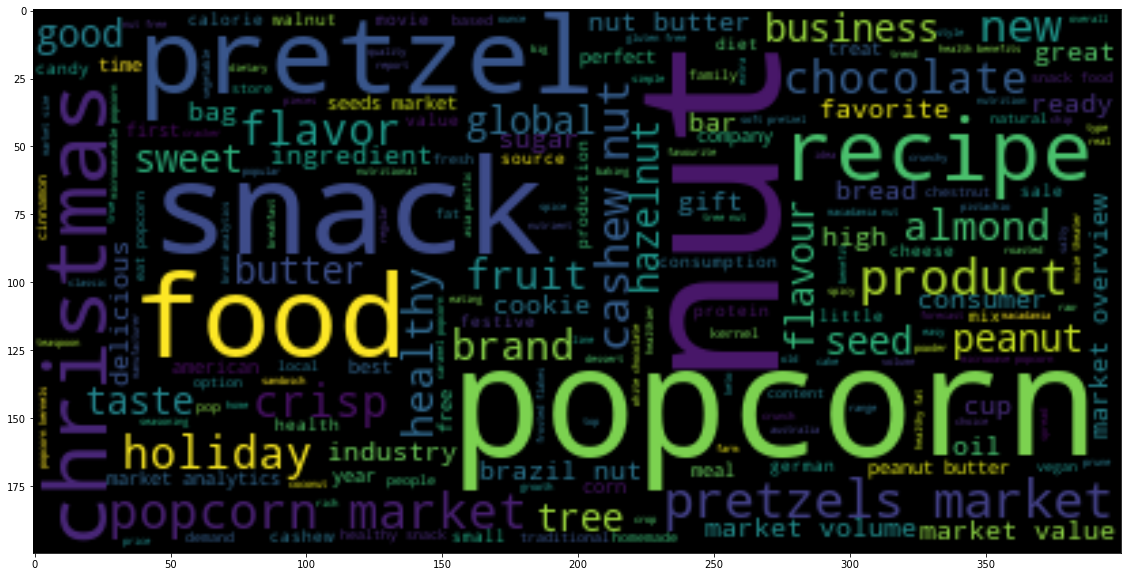

In [136]:
create_wordcloud(final_df[final_df['doc_date_month'].isin([12])].reset_index().drop(['index'],1))

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\deep\anaconda3\envs\myenv\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07

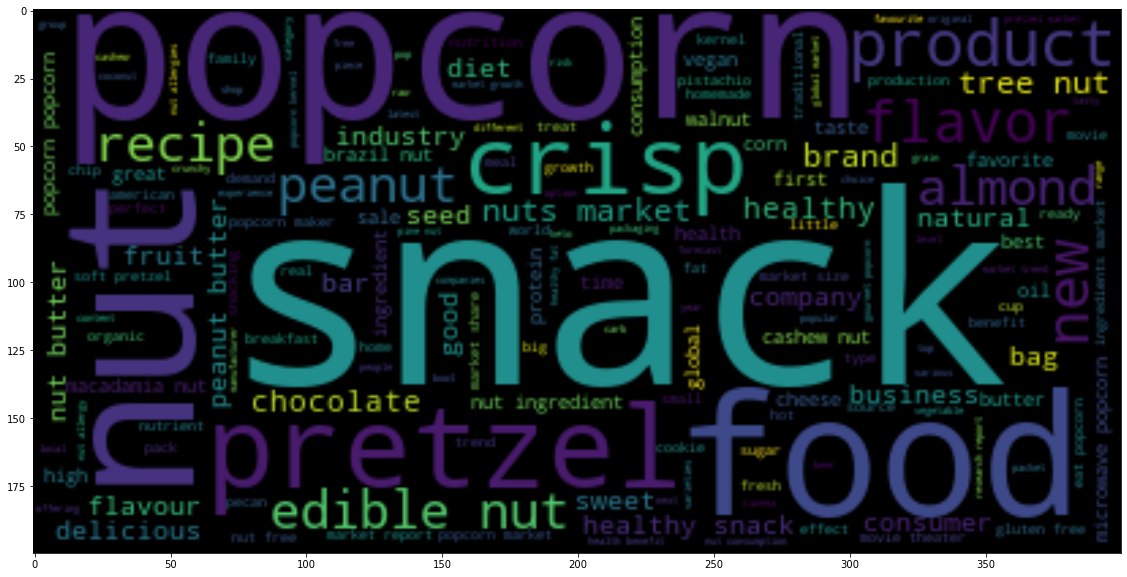

In [137]:
create_wordcloud(final_df[final_df['doc_date_month'].isin([6,7,8])].reset_index().drop(['index'],1))

In [48]:
def get_postive_ne_neutral(list_months,word,season):
    dff = final_df[(final_df['doc_date_month'].isin(list_months)) & (final_df['sentences'].str.contains(word,na = False))].reset_index().drop(['index'],1)
    no_postivies = len(dff[dff['Sentiments_label']=='Positive'])
    no_negative = len(dff[dff['Sentiments_label']=='Negative'])
    no_neutral = len(dff[dff['Sentiments_label']=='Neutral'])
    fig = px.pie(values=[no_postivies,no_negative,no_neutral], names=['Positive Docs','Negative Docs','Neutral Docs'], title='Impact of '+word+' in '+season+'.')
    fig.show()
    #fig = px.bar(x = ['Positive Docs','Negative Docs','Neutral Docs'], color = ['Positive Docs','Negative Docs','Neutral Docs'], y = [no_postivies,no_negative,no_neutral], title = 'Impact of '+word+' in '+season+'.')
    #fig.show()   

In [49]:
get_postive_ne_neutral([6,7,8],'crisp','Summer')

In [50]:
get_postive_ne_neutral([6,7,8],'nuts','Summer')

In [35]:
get_postive_ne_neutral([12],'pretzel','Chistmas')

In [36]:
def get_plots_country(list_months,word):
    dff = final_df[(final_df['doc_date_month'].isin(list_months)) & (final_df['sentences'].str.contains(word,na = False)) ].reset_index().drop(['index'],1)
    df_plot1 = dff.groupby(['Country','Sentiments_label']).size().to_frame('count').reset_index()
    fig = px.histogram(df_plot1, x="Country", y='count',
                 color='Sentiments_label', barmode='group',
                 height=400)
    fig.show()  

In [37]:
get_plots_country([12],'pretzel')

In [38]:
get_plots_country([6,7,8],'crisp')

In [39]:
get_plots_country([6,7,8],'nuts')

# Topic Modeling

In [91]:
text_data = []

In [92]:
for i in range(len(final_df)):
    text_data.append(', '.join(final_df['doc_keyphrases'][i]))

In [86]:
for i in range(len(final_df)):
    try:
        if math.isnan(final_df['sentences'][i]):
            text_data.append(', '.join(final_df['doc_keyphrases'][i]))
    except:
        text_data.append(final_df['sentences'][i])

In [101]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np 

In [102]:
doc_token = []

In [103]:
for i in range(len(text_data)):
    doc_token.append(preprocess(text_data[i]))

In [104]:
dictionary = corpora.Dictionary(doc_token)

In [106]:
bow = [dictionary.doc2bow(text) for text in doc_token]

In [113]:
best_num = float('NaN')
best_score = 0

In [114]:
for i in range(2,10):
    
    # create lda model with i topics
    lda = LdaModel(corpus=bow, num_topics=i, id2word=dictionary, random_state=42)
    
    # obtain the coherence score
    coherence_model = CoherenceModel(model=lda, texts=doc_token, dictionary=dictionary, coherence='c_v')
    coherence_score = np.round(coherence_model.get_coherence(),2)
    if coherence_score > best_score:
        best_num = i
        best_score = coherence_score

print(f'The coherence score is highest ({best_score}) with {best_num} topics.')

The coherence score is highest (0.59) with 4 topics.


In [122]:
# build the lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=42)

In [123]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.020*"popcorn" + 0.008*"snacks" + 0.007*"free" + 0.006*"flavors" + 0.006*"chocolate" + 0.006*"corn" + 0.006*"pretzel" + 0.005*"recipe" + 0.005*"pretzels" + 0.005*"butter"')
(1, '0.016*"nuts" + 0.012*"healthy" + 0.008*"health" + 0.007*"diet" + 0.007*"foods" + 0.006*"snacks" + 0.005*"benefits" + 0.005*"fats" + 0.005*"high" + 0.005*"good"')
(2, '0.013*"snacks" + 0.010*"crisps" + 0.009*"market" + 0.007*"nuts" + 0.007*"products" + 0.007*"brand" + 0.006*"industry" + 0.005*"company" + 0.005*"global" + 0.005*"crisp"')


In [124]:
# obtain topic distributions for each document
topic_dist = lda_model[bow]

# store distributions ina list
dist = []
for t in topic_dist:
    dist.append(t)

# # add list to the data frame 
# df['Topic Distribution'] = topic_dist

# # dataset preview
# df[['Text', 'Topic Distribution']].head()

In [125]:
import pyLDAvis
import pyLDAvis.gensim_models as gensim_models

# visualize LDA model results
pyLDAvis.enable_notebook()
gensim_models.prepare(lda_model, dictionary=dictionary, corpus=bow)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.015990 -0.104476       1        1  37.793627
2     -0.117246  0.040770       2        1  32.691187
1      0.101256  0.063706       3        1  29.515186, topic_info=            Term         Freq        Total Category  logprob  loglift
96       popcorn  2244.000000  2244.000000  Default  30.0000  30.0000
205      healthy  1290.000000  1290.000000  Default  29.0000  29.0000
700       crisps  1022.000000  1022.000000  Default  28.0000  28.0000
155       market   888.000000   888.000000  Default  27.0000  27.0000
157         nuts  1959.000000  1959.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
166        seeds   187.790606   392.075027   Topic3  -5.8923   0.4841
156      natural   193.404379   435.858902   Topic3  -5.8629   0.4077
187  ingredients   203.571800   560.320868   Topic3  -5.8116   0.2078
785       peanut   206.595755   724.559728   Topic3  -5.7969  -0.0345
18      products   192.029256  1042.603098   Topic3  -5.8700  -0.4716

[284 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1250       1  0.051299     acid
1250       2  0.038474     acid
1250       3  0.910562     acid
1991       2  0.954881  adheres
1896       1  0.048425   adults
...      ...       ...      ...
347        2  0.075311    white
347        3  0.130540    white
20313      2  0.952960    wolds
5328       1  0.068667     zinc
5328       3  0.961333     zinc

[592 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
Topic 1 : Food Products
Topic 2 : Business
Topic 3 : Nutrition